In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [3]:
dataset=pd.read_csv("/content/customer_support_tickets.csv")

In [4]:
dataset.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


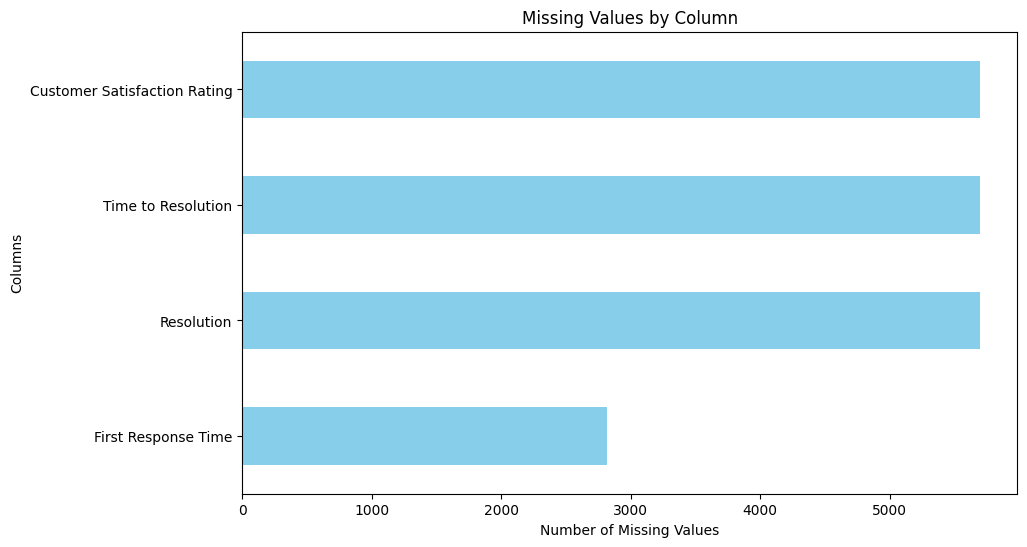

In [5]:
#Overview of missing values
def plot_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)

    missing_values.plot(kind='barh', color='skyblue', figsize=(10, 6))
    plt.title('Missing Values by Column')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    plt.show()

plot_missing_values(dataset)

In [6]:
#Summary Statistics
def numerical_summary(df):
    print("\nSummary Statistics for Numerical Columns:")
    print(df.describe())

numerical_summary(dataset)


Summary Statistics for Numerical Columns:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


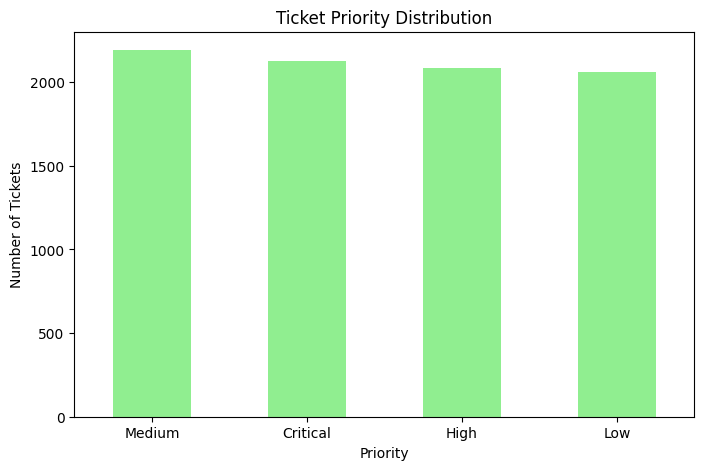

In [7]:
#Ticket priority distribution
def ticket_priority_distribution(df):
    priority_counts = df['Ticket Priority'].value_counts()

    priority_counts.plot(kind='bar', color='lightgreen', figsize=(8, 5))
    plt.title('Ticket Priority Distribution')
    plt.xlabel('Priority')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=0)
    plt.show()

ticket_priority_distribution(dataset)

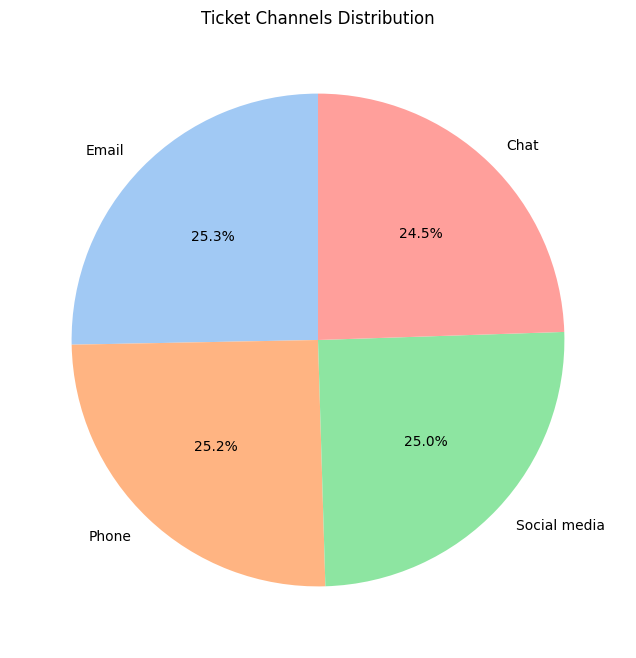

In [8]:
#Channel Analysis
def channel_analysis(df):
    channel_counts = df['Ticket Channel'].value_counts()

    channel_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Ticket Channels Distribution')
    plt.ylabel('')
    plt.show()

channel_analysis(dataset)


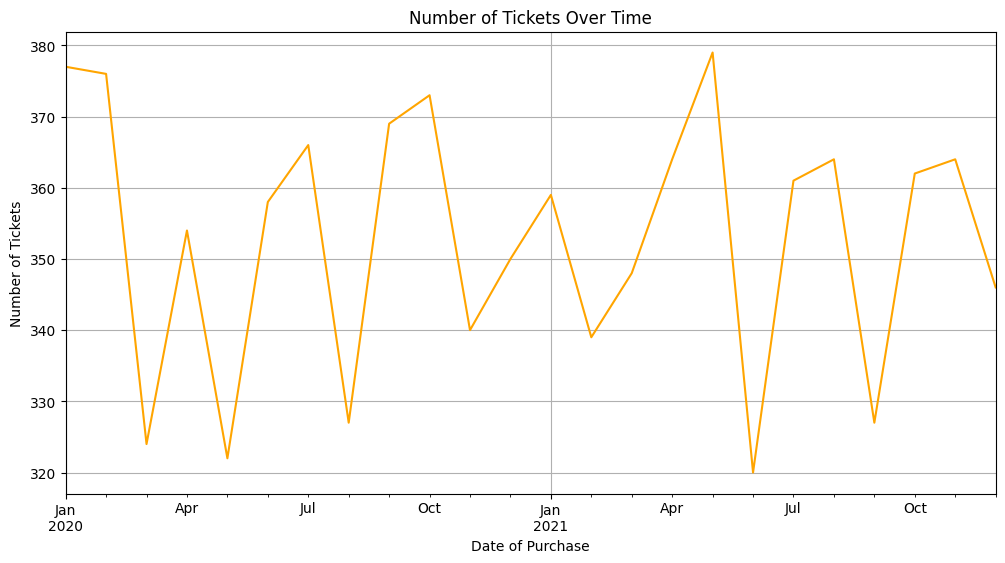

In [9]:
#Time Analysis
def time_analysis(df):
    df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
    time_trends = df.groupby(df['Date of Purchase'].dt.to_period('M')).size()

    time_trends.plot(kind='line', figsize=(12, 6), color='orange')
    plt.title('Number of Tickets Over Time')
    plt.xlabel('Date of Purchase')
    plt.ylabel('Number of Tickets')
    plt.grid()
    plt.show()

time_analysis(dataset)

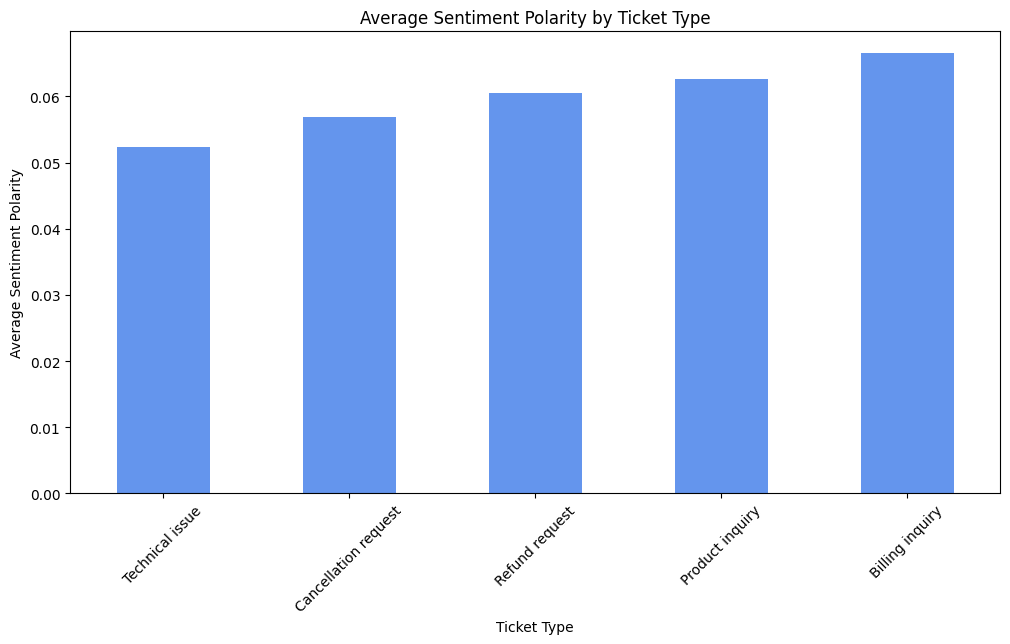


Sentiment Polarity by Ticket Type:
Ticket Type
Technical issue         0.052303
Cancellation request    0.056910
Refund request          0.060538
Product inquiry         0.062695
Billing inquiry         0.066508
Name: Sentiment Polarity, dtype: float64


In [10]:
#Sentiment Analysis
def sentiment_by_type(df):
    if 'Ticket Description' in df.columns and 'Ticket Type' in df.columns:
        df['Sentiment Polarity'] = df['Ticket Description'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
        sentiment_summary = df.groupby('Ticket Type')['Sentiment Polarity'].mean().sort_values()

        plt.figure(figsize=(12, 6))
        sentiment_summary.plot(kind='bar', color='cornflowerblue')
        plt.title('Average Sentiment Polarity by Ticket Type')
        plt.xlabel('Ticket Type')
        plt.ylabel('Average Sentiment Polarity')
        plt.xticks(rotation=45)
        plt.show()

        print("\nSentiment Polarity by Ticket Type:")
        print(sentiment_summary)

sentiment_by_type(dataset)


In [11]:
#Response Automation
#Analyze the features of the automation
# Standardized Ticket Subjects and Description Analysis
subject_analysis = dataset['Ticket Subject'].value_counts()
description_patterns = dataset['Ticket Description'].str.extract(r'issue with (.*?)\.').value_counts()

# Priority and Type Analysis
priority_type_analysis = dataset.groupby(['Ticket Priority', 'Ticket Type']).size().reset_index(name='Counts')

# Resolution Suggestion Automation (finding common resolutions for similar subjects)
resolution_analysis = dataset.groupby('Ticket Subject')['Resolution'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='Most Common Resolution')

# Channel-Specific Automation
channel_analysis = dataset['Ticket Channel'].value_counts()

# Detecting delayed responses
dataset['First Response Time'] = pd.to_datetime(dataset['First Response Time'], errors='coerce')
dataset['Time to Resolution'] = pd.to_datetime(dataset['Time to Resolution'], errors='coerce')
dataset['Response Delay'] = (dataset['First Response Time'] - pd.to_datetime(dataset['Date of Purchase'], errors='coerce')).dt.total_seconds()
dataset['Resolution Delay'] = (dataset['Time to Resolution'] - dataset['First Response Time']).dt.total_seconds()

delayed_responses = dataset[dataset['Response Delay'] > 3600]  # Example: >1 hour delay
subject_analysis, description_patterns, priority_type_analysis, resolution_analysis, channel_analysis, delayed_responses[['Ticket ID', 'Response Delay']]


(Ticket Subject
 Refund request              576
 Software bug                574
 Product compatibility       567
 Delivery problem            561
 Hardware issue              547
 Battery life                542
 Network problem             539
 Installation support        530
 Product setup               529
 Payment issue               526
 Product recommendation      517
 Account access              509
 Peripheral compatibility    496
 Data loss                   491
 Cancellation request        487
 Display issue               478
 Name: count, dtype: int64,
 0                                                                                                                                   
 the {product_purchased}                                                                                                                 5868
 my {product_purchased}                                                                                                                   164
 further u